# EcoFOCIpy 21CKP-12A RCM 651 QC

see [EcoFOCIpy_21ckp12a_rcm.ipynb](EcoFOCIpy_21ckp12a_rcm.ipynb) for initial processing and formatting.  Data would have been convertted from raw instrument format to csv files, initial dirty plots created and a meta-data rich and meta-data poor dataset would have been created.  The metadata poor csv file is used for the initial preliminary data archive, the metadata rich netcdf file is used for QC procedures and eventual final data archive.

## Next Steps

QC of data (plot parameters with other instruments)
- be sure to updated the qc_status and the history

- **TODO** Programmatically simplify following tools

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import yaml

import pandas as pd
import xarray as xr
import datetime
import ecofocipy.io.erddap as erddap

import ecofocipy.metaconfig.load_config as load_config

In [22]:
sample_data_dir = '/Users/bell/Programs/EcoFOCIpy/'
user_data_dir = '/Users/bell/ecoraid/2021/Moorings/21ckp12a/'

In [23]:
###############################################################
# edit to point to {instrument sepcific} raw datafile 
datafile = user_data_dir+'rawconverted/rcm/21ckp12a_rcm9_651.txt'
instrument = 'RCM9 651'
mooring_meta_file = user_data_dir+'logs/21CKP-12A.yaml'
inst_meta_file = sample_data_dir+'staticdata/instr_metaconfig/rcm_cf.yaml'
institution_meta_file = sample_data_dir+'staticdata/institutional_meta_example.yaml' #include uaf?
inst_shortname = 'an9'
###############################################################

In [24]:
#just a dictionary of dictionaries - simple
with open(mooring_meta_file) as file:
    mooring_config = yaml.full_load(file)

In [25]:
# this task only needed to be run once in the initial processing routine
# (sbe16_wop_nc.autotrim_time().to_dataframe()).to_csv(filename.replace('nc','csv')) #because the raw archived csv file doesn't trim out deck data, start with this file to edit 

#if it wasn't run, you can ingest the working netcdf file -> export it to csv as it should have been saved as a trimmed file, and work on that csv for manual edits
depth = str(int(mooring_config['Instrumentation'][instrument]['ActualDepth'])).zfill(4)
filename = "".join(mooring_config['MooringID'].split('-')).lower()+'_'+inst_shortname+'_'+str(depth).zfill(4)+'m.nc'
rcm_wop_nc = xr.load_dataset(user_data_dir+'working/'+filename)


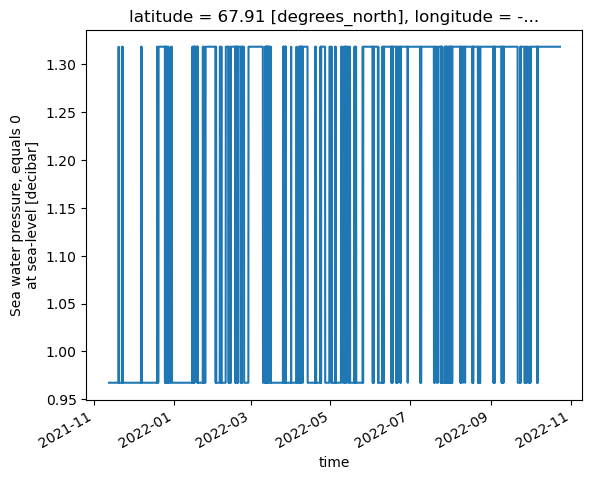

In [26]:
rcm_wop_nc.pressure.plot()

<div class="alert alert-warning">
  <strong>Bad Pressure values - no variability?</strong>
    <p>
    </p>
</div>


In [27]:
import numpy as np
import xarray as xa
rcm_wop_nc['pressure'].values = xa.full_like(rcm_wop_nc['pressure'], np.nan).values

### Update global attributes

In [29]:
rcm_wop_nc.attrs.update({'QC_indicator': 'ProbablyGood'})
rcm_wop_nc.attrs.update({'history':(rcm_wop_nc.history + "\nQCd: "+ str(datetime.datetime.today()))})

In [31]:
rcm_wop_nc.attrs.update({'date_modified':str(datetime.datetime.today())})

In [32]:
rcm_wop_nc.to_netcdf(user_data_dir+'working/'+filename,format="NETCDF3_CLASSIC",encoding={'time':{'units':'days since 1900-01-01'}})